In [1]:
'''
    Script to load and analyze the data from NExSci and ExoFOP

pip install bokeh
pip install astroquery
Ruizhi Zhan modified from original code by Daniel Koll
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

root = os.getcwd()
root_prefixed = lambda p: os.path.join(root,p)

In [2]:
# update the exoplanet data
download_script = root_prefixed('download-planet-data.py')
os.system(f'python {download_script}')

256

In [3]:
# read in all planets
df = pd.read_csv(root_prefixed('data/exoplots_data.csv'))
df.head() # print out a few rows

name             hostname  IC disposition     period  \
0  OGLE-2016-BLG-1227L b  OGLE-2016-BLG-1227L NaN   Confirmed        NaN   
1           Kepler-276 c           Kepler-276 NaN   Confirmed  31.884000   
2           Kepler-829 b           Kepler-829 NaN   Confirmed   6.883376   
3               K2-283 b               K2-283 NaN   Confirmed   1.921036   
4           Kepler-477 b           Kepler-477 NaN   Confirmed  11.119907   

   rade   rade_est  rade_err1  rade_err2      radj  ...  st_teff  st_log_lum  \
0   NaN  13.947316        NaN        NaN       NaN  ...      NaN         NaN   
1  2.90        NaN       1.27      -0.28  0.258721  ...   5779.0      -0.089   
2  2.11        NaN       0.44      -0.18  0.188242  ...   5698.0       0.040   
3  3.52        NaN       0.16      -0.16  0.314034  ...   5060.0      -0.524   
4  2.07        NaN       0.18      -0.12  0.184673  ...   5240.0      -0.372   

     Jmag    Kmag          ra        dec  flag_tran  flag_kepler  flag_k2  \
0     NaN     NaN  265.597125 -33.759778      False        False    False   
1  14.234  13.838  293.568197  39.036312       True         True    False   
2  13.699  13.290  282.332831  42.463813       True         True    False   
3  12.579  11.983   13.194368   9.692918       True        False     True   
4  12.274  11.729  288.067445  42.355305       True         True    False   

                                                 url  
0  https://exoplanetarchive.ipac.caltech.edu/over...  
1  https://exoplanetarchive.ipac.caltech.edu/over...  
2  https://exoplanetarchive.ipac.caltech.edu/over...  
3  https://exoplanetarchive.ipac.caltech.edu/over...  
4  https://exoplanetarchive.ipac.caltech.edu/over...  

[5 rows x 43 columns]

In [4]:
# check how many planets have BOTH mass + radius
print( "Planets with BOTH real radius and mass: ", np.sum( np.logical_and(~np.isnan(df['rade']),~np.isnan(df['masse'])) ) )
print( "Planets with BOTH real radius and mass, that are smaller than 2Re: ", 
                                                       np.sum( 
                                                           np.logical_and(
                                                               np.logical_and(~np.isnan(df['rade']),~np.isnan(df['masse'])),
                                                               df['rade']<2
                                                           )
                                                       ) )

Planets with BOTH real radius and mass:  1199
Planets with BOTH real radius and mass, that are smaller than 2Re:  173


In [33]:
# first, many planets only have estimated mass or radius
# --> use best of (data, estimate) to get rid of nans
print( "Total planets: ", len(df) )
print( "Planets with real radii: ", np.sum(~np.isnan(df['rade'])) )
print( "Planets with estd. radii: ", np.sum(~np.isnan(df['rade_est'])) )
print( "Sum: ", np.sum(~np.isnan(df['rade'])) + np.sum(~np.isnan(df['rade_est'])) )

df['rade_merged'] = np.zeros_like(df['rade'].copy()) * np.nan
mask = ~np.isnan(df['rade'])
df.loc[mask,'rade_merged'] = df.loc[mask,'rade']      # where available, use real values
mask = np.logical_and( np.isnan(df['rade']), ~np.isnan(df['rade_est']) )
df.loc[mask,'rade_merged'] = df.loc[mask,'rade_est']  # else use estimated values
print( "** Nr of planets with some kind of radius: ", np.sum(~np.isnan(df['rade_merged'])) )

# ---
print( "Planets with real mass: ", np.sum(~np.isnan(df['masse'])) )
print( "Planets with estd. mass: ", np.sum(~np.isnan(df['masse_est'])) )
print( "Sum: ", np.sum(~np.isnan(df['masse'])) + np.sum(~np.isnan(df['masse_est'])) )

df['masse_merged'] = np.zeros_like(df['masse'].copy()) * np.nan
mask = ~np.isnan(df['masse'])
df.loc[mask,'masse_merged'] = df.loc[mask,'masse']  # where available, use real values
mask = np.logical_and( np.isnan(df['masse']), ~np.isnan(df['masse_est']) )
df.loc[mask,'masse_merged'] = df.loc[mask,'masse_est']
print( "** Nr of planets with some kind of mass: ", np.sum(~np.isnan(df['masse_merged'])) )

# also check other parameters
print( "Planets with stellar radii: ", np.sum(~np.isnan(df['st_rad'])) )
print( "Planets with stellar mass: ", np.sum(~np.isnan(df['st_mass'])) )
print( "Planets with stellar temp: ", np.sum(~np.isnan(df['st_teff'])) )
print( "Planets with orbital periods: ", np.sum(~np.isnan(df['period'])) )

# df.head()

Total planets:  13558
Planets with real radii:  11690
Planets with estd. radii:  1342
Sum:  13032
** Nr of planets with some kind of radius:  13032
Planets with real mass:  2541
Planets with estd. mass:  10491
Sum:  13032
** Nr of planets with some kind of mass:  13032
Planets with stellar radii:  12854
Planets with stellar mass:  12156
Planets with stellar temp:  12797
Planets with orbital periods:  13204


In [10]:
check_list = ['Epsilon Indi A b']
#check the name in checklist to see if it is in the df
for name in check_list:
    print( name, " in df? ", name in df['name'].values )

Epsilon Indi A  in df?  False


In [91]:
# print(df.index, df.columns, df.dtypes, df.shape, df.size, df.values, df.describe(), df.info(), df.head(), df.tail(), df.sample(5))
# 'period' 'mass' 
# for loop all planets
R_sun = 6.96e8 # m
AU = 1.496e11 # m
T_planet = []
R_planet = []
M_planet = []
T_star = []
for i in range(len(df)):
    if ~np.isnan(df['st_rad'][i]) and ~np.isnan(df['st_mass'][i]) and ~np.isnan(df['st_teff'][i]) and ~np.isnan(df['period'][i]):
        if ~np.isnan(df['rade'][i]) and ~np.isnan(df['masse'][i]) and ~np.isnan(df['semi_au'][i]):
            Tstar = df['st_teff'][i]
            Rstar = df['st_rad'][i]
            d = df['semi_au'][i]
            T_planet.append(Tstar * (Rstar*R_sun/(2*d*AU))**0.5)
            R_planet.append(df['rade'][i])
            M_planet.append(df['masse'][i])
            T_star.append(Tstar)
            if T_planet[-1] > 2400 and R_planet[-1] < 2:
                print(f"{df['name'][i]}: {T_planet[-1]} K")
T_planet = np.array(T_planet); R_planet = np.array(R_planet); M_planet = np.array(M_planet)
            

KOI-55 c: 6860.912750403273 K
HD 80653 b: 2463.1582215602566 K
KOI-55 b: 7721.702539398411 K


27730.0 2320.0


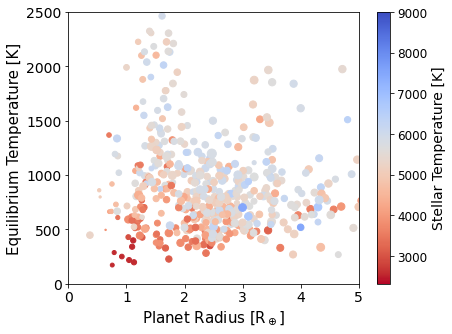

In [92]:
fig, ax = plt.subplots(1,1,figsize=(6.5,5))
# scatter plot: size: M_planet, color: T_star
resized_M_planet = np.log10(M_planet) - np.min(np.log10(M_planet))+0.1
print(np.max(T_star), np.min(T_star))
# set upper limit for T_star
resized_T_star = np.minimum(T_star, 9000)
plot = ax.scatter(R_planet, T_planet, s=20*resized_M_planet, c=resized_T_star, cmap='coolwarm_r', alpha=1.0)
ax.set_ylim(0, 2500)
ax.set_xlim(0,5)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Planet Radius [R$_\oplus$]', fontsize=15)
ax.set_ylabel('Equilibrium Temperature [K]', fontsize=15)
cbar = fig.colorbar(plot, ax=ax)
cbar.set_label('Stellar Temperature [K]', fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.show()

[1.00000000e-05 1.58489319e-05 2.51188643e-05 3.98107171e-05
 6.30957344e-05 1.00000000e-04 1.58489319e-04 2.51188643e-04
 3.98107171e-04 6.30957344e-04 1.00000000e-03 1.58489319e-03
 2.51188643e-03 3.98107171e-03 6.30957344e-03 1.00000000e-02
 1.58489319e-02 2.51188643e-02 3.98107171e-02 6.30957344e-02
 1.00000000e-01 1.58489319e-01 2.51188643e-01 3.98107171e-01
 6.30957344e-01 1.00000000e+00 1.58489319e+00 2.51188643e+00
 3.98107171e+00 6.30957344e+00 1.00000000e+01 1.58489319e+01
 2.51188643e+01 3.98107171e+01 6.30957344e+01 1.00000000e+02]
